
 # <span style="color:red">   Netflix data analysis  </span>
   We analyse the netfilx data here to find out things such as, which 
   
   * country leads in Netflix
   * the actors
   * the directors etc..
   

In [1]:
import random
import pandas as pd
import numpy as np
from dateutil.parser import parse

from wordcloud import STOPWORDS,WordCloud
import matplotlib.pyplot as plt
import circlify
import squarify 
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("netflix.csv",parse_dates=['date_added'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6202 non-null   object        
 4   cast          7983 non-null   object        
 5   country       7987 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


## Statistics of movies/shows

In [4]:
date=df[["type", "date_added", "country"]].dropna()

In [5]:
date=date.sort_values(by="date_added").reset_index(drop=True)

In [6]:
date["year"]= pd.DatetimeIndex(date["date_added"]).year

In [7]:
date

,type,date_added,country,year
0,Movie,2008-01-01,United States,2008
1,TV Show,2008-02-04,United States,2008
2,Movie,2009-05-05,Denmark,2009
3,Movie,2009-11-18,United States,2009
4,Movie,2010-11-01,United States,2010
...,...,...,...,...
7973,TV Show,2021-09-24,United Kingdom,2021
7974,Movie,2021-09-24,"United States, Ghana, Burkina Faso, United Kin...",2021
7975,TV Show,2021-09-24,India,2021
7976,TV Show,2021-09-24,South Africa,2021


In [8]:
movies=date[date["type"]=="Movie"].year.value_counts()
shows=date[date["type"]=="TV Show"].year.value_counts()

In [9]:
movies.to_csv("movies-years.csv")
shows.to_csv("shows-years.csv")

In [10]:
len(movies.values)

14

In [11]:
shows

2020    548
2019    509
2021    375
2018    338
2017    309
2016    166
2015     25
2013      5
2014      5
2008      1
Name: year, dtype: int64

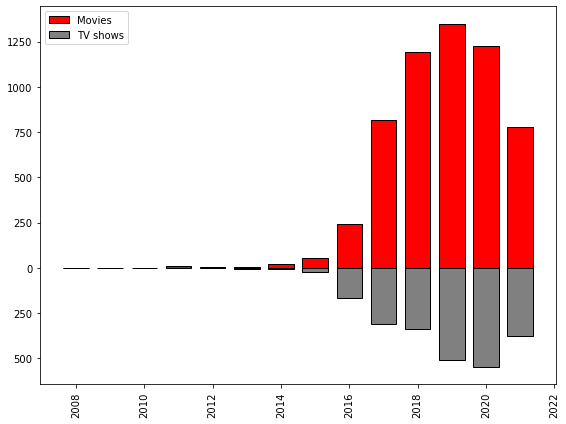

In [12]:
fig, ax = plt.subplots(figsize=(8,6))

p1=ax.bar(movies.keys(), movies.values, label="Movies",edgecolor='black',color='red',width=0.75,align='center')
p2=ax.bar(shows.keys(), -shows.values,label="TV shows",edgecolor='black',color='grey',width=0.75)


plt.xticks(rotation=90)
plt.tight_layout()

ticks =  ax.get_yticks()
ax.set_yticklabels([int(abs(tick)) for tick in ticks])
plt.legend(loc='upper left')
plt.show()


In [13]:
df1=df[["type", "country"]]

In [14]:
df1=df1.dropna()

In [15]:
counry_list=[]
type_list=[]
stringlist= df1["country"].values.tolist()
ratinglist=df1["type"].values.tolist()
i=0
for element in stringlist:
    letter_list = element.split(", ")
    counry_list.extend(letter_list)
    type_list.extend([ratinglist[i]]*len(letter_list))
    i=i+1

In [16]:
country_type = pd.DataFrame({'country':counry_list, 'type':type_list})

In [17]:
country_type.sort_values(by="type")

,country,type
0,United States,Movie
6498,United States,Movie
6497,Egypt,Movie
6496,Canada,Movie
6495,Indonesia,Movie
...,...,...
1796,South Korea,TV Show
3553,United States,TV Show
1791,South Korea,TV Show
7844,United Kingdom,TV Show


In [18]:
s=country_type.value_counts()

In [19]:
s

country             type   
United States       Movie      2751
India               Movie       963
United States       TV Show     940
United Kingdom      Movie       532
Canada              Movie       319
                               ... 
Ecuador             Movie         1
East Germany        Movie         1
Dominican Republic  Movie         1
Sri Lanka           Movie         1
                    Movie         1
Length: 188, dtype: int64

In [20]:
s1=s.unstack(level=-1).reset_index()

In [21]:
s1=s1.fillna(0)

In [22]:
s1=s1.astype({'Movie': 'int32','TV Show': 'int32'})

In [23]:
s1

type,country,Movie,TV Show
0,,1,1
1,Afghanistan,1,0
2,Albania,1,0
3,Algeria,3,0
4,Angola,1,0
...,...,...,...
122,Vatican City,1,0
123,Venezuela,4,0
124,Vietnam,7,0
125,West Germany,3,2


In [24]:
data=s1[["country", "Movie", "TV Show"]]

In [25]:
data.set_index('country', inplace=True)

In [26]:
data=data.sort_values(by="Movie",ascending=False)

In [27]:
data1=data.iloc[:10]

In [28]:
data1.to_csv("comaprecountries.csv")

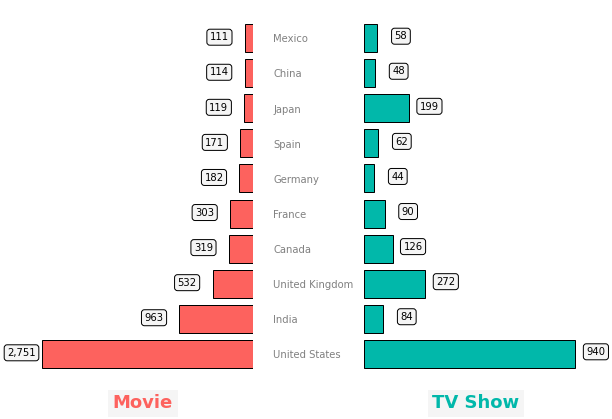

In [29]:
font_color = '#525252'
facecolor = 'white'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = data1.index
column0 = data1['Movie']
column1 = data1['TV Show']
title0 = 'Movie'
title1 = 'TV Show'

fig, axes = plt.subplots(figsize=(10,7), facecolor=facecolor, ncols=2, sharey=True)


fig.tight_layout()
p1=axes[0].barh(index, column0, align='center', color=color_red, edgecolor="black",zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red,  y=-0.1,fontweight='bold',backgroundcolor='whitesmoke')
p2=axes[1].barh(index, column1, align='center', color=color_blue, edgecolor="black", zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue,  y=-0.1,fontweight='bold',backgroundcolor='whitesmoke')
axes[0].invert_xaxis() 
axes[0].set_xticks([])



axes[0].set_frame_on(False)
plt.axis('off')
for rect in p1:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = -35
    ha = 'left'

    if x_value < 0:
        space *= -1
        ha = 'right'

    label = '{:,.0f}'.format(x_value)

    axes[0].annotate(
        label,                      
        (x_value, y_value), bbox=dict(facecolor='whitesmoke', edgecolor='black', boxstyle='round'),        
        xytext=(space, 1),           
        textcoords='offset points', 
        va='center',                
        ha=ha,                     
        color = 'black') 


for rect in p2:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 30
    ha = 'right'

    if x_value < 0:
        space *= -1
        ha = 'left'

    label = '{:,.0f}'.format(x_value)

    axes[1].annotate(
        label,                      
        (x_value, y_value), bbox=dict(facecolor='whitesmoke', edgecolor='black', boxstyle='round'),        
        xytext=(space,2.0),         
        textcoords='offset points',
        va='center',                
        ha=ha,                      
        color = 'black') 



axes[0].set(yticks=data1.index, yticklabels=data1.index)
axes[0].tick_params(axis='y', pad=20, right=True,length=0)

axes[0].yaxis.tick_right()
axes[0].tick_params(axis='y', colors='gray') # tick color
plt.subplots_adjust(wspace=0.5, top=0.85, bottom=0.1, left=0.18, right=0.95)


    

# Which country leads in Netflix?

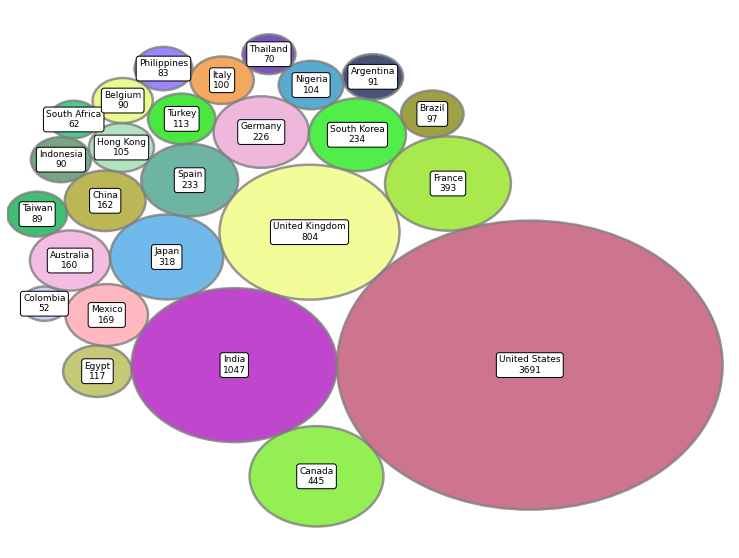

In [30]:
country=df["country"].dropna()
country_list=[]
stringlist= country.values.tolist()
for element in stringlist:
    letter_list = element.split(", ")
    country_list.extend(letter_list)
    
unique_countries = list(set(country_list))
unique_countries.remove('')

country_name=[]
count=[]
for element in unique_countries:
    n=country_list.count(element)
    country_name.append(element)
    count.append(n)  
    
    
country_table = pd.DataFrame({'country':country_name, 'count':count})
country_table=country_table.sort_values(by="count",ascending=True).reset_index(drop=True)
country_table_sub=country_table.iloc[100:]
country_table_sub.to_csv("country_count.csv", index=None)



circles = circlify.circlify(
    country_table_sub["count"].tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=0.5)
)


fig, ax = plt.subplots(figsize=(13,10))
ax.axis('off')

lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

label=country_table_sub["country"].values
value=country_table_sub["count"].values

i=0
col=[]
random.seed(2)
for j in range(len(country_table_sub)):
    rand_colors = "#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])# Add bars
    col.append(rand_colors)
 
for circle in circles:
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.8, linewidth=0.1,  fill=True,color=col[i]))
    ax.add_patch(plt.Circle((x, y), r, alpha=0.8, linewidth=2.5,  fill=False,color="grey"))


    plt.annotate('{}\n{}'.format(label[i],value[i]),
          (x,y ) ,
          bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'),  fontsize=9,    
          va='center',
          ha='center'

     )
    i=i+1     

# Slected countries statistics over the years

In [31]:
country_list=[ "United States", "India", "United Kingdom", "Canada"]
year_list=[2017,2018, 2019,2020,2021]


matrix1=[]
matrix2=[]
for c in country_list:
    mat=[]
    df_india1=df[df["country"].str.contains(pat = c) | df["country"].str.contains(pat =c,)]
    for y in year_list:
        s=df_india1[pd.DatetimeIndex(df_india1["date_added"]).year==y].type.value_counts()
        mat.append( s.values.tolist())
    matrix1.append(np.array(mat).T[0])
    matrix2.append(np.array(mat).T[1])  
movies=np.array(matrix1).T
shows=np.array(matrix2).T

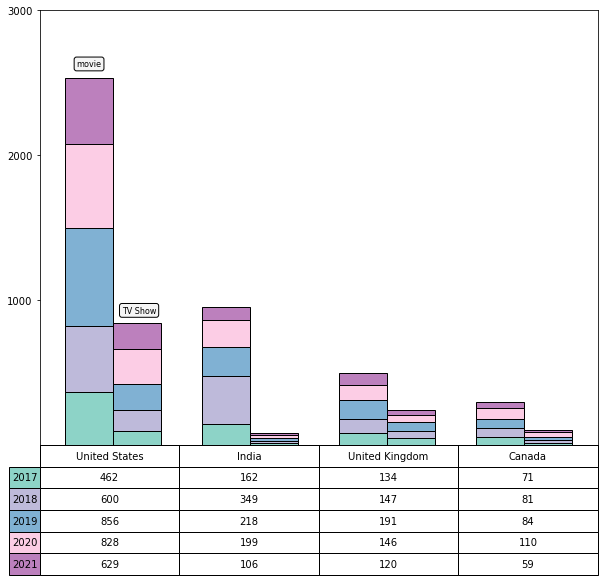

In [32]:
rows=year_list
columns = country_list


colors=plt.cm.Set3(np.linspace(0, 0.8, len(rows)))
index = np.arange(len(columns)) + 0.2
index1 = np.arange(len(columns)) + 0.9



matrix1=movies
matrix2=shows



plt.subplots(figsize=(10,8))
bar_width=0.35
plt.bar(index,  matrix1[0], bar_width, edgecolor="black",color=colors[0])
plt.bar(index,  matrix1[1], bar_width, edgecolor="black", color=colors[1], bottom=matrix1[0])
plt.bar(index,  matrix1[2], bar_width, edgecolor="black",color=colors[2], bottom=matrix1[0]+matrix1[1])
plt.bar(index,  matrix1[3], bar_width, edgecolor="black",color=colors[3], bottom=matrix1[0]+matrix1[1]+matrix1[2])
plt.bar(index,  matrix1[4], bar_width, edgecolor="black",color=colors[4], bottom=matrix1[0]+matrix1[1]+matrix1[2]+matrix1[3])


plt.bar(index+bar_width, matrix2[0], bar_width, edgecolor="black", color=colors[0])
plt.bar(index+bar_width, matrix2[1], bar_width, edgecolor="black", color=colors[1], bottom=matrix2[0])
plt.bar(index+bar_width, matrix2[2], bar_width, edgecolor="black", color=colors[2], bottom=matrix2[0]+matrix2[1])
plt.bar(index+bar_width, matrix2[3], bar_width, edgecolor="black", color=colors[3], bottom=matrix2[0]+matrix2[1]+matrix2[2])
plt.bar(index+bar_width, matrix2[4], bar_width, edgecolor="black", color=colors[4], bottom=matrix2[0]+matrix2[1]+matrix2[2]+matrix2[3])


plt.annotate('movie',
         (0.2,2630 ) ,
         bbox=dict(facecolor='whitesmoke', edgecolor='black', boxstyle='round'),  fontsize=8,    
         va='center',
         ha='center'

   )

plt.annotate('TV Show',
         (0.565,930 ) ,
         bbox=dict(facecolor='whitesmoke', edgecolor='black', boxstyle='round'),  fontsize=8,    
          va='center',
          ha='center'

     )
the_table=plt.table(cellText=matrix2+matrix1, colLabels=columns, cellLoc='center', rowLabels=rows,  rowColours=colors, loc='bottom')
the_table.scale(1, 1.8)
plt.yticks([ 1000,2000,3000])
plt.xticks([])

plt.show()


# Popular genre in Netflix

In [33]:
STOPWORDS.update({"International TV Shows", "International Movies", "TV Shows","TV", "International", "Shows" ,"Movies"})

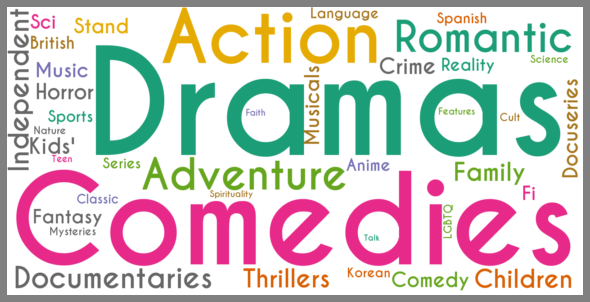

In [34]:
font_path = '/Users/jemseenav/Downloads/caviar_dreams/CaviarDreams_Bold.ttf'

wordcloud = WordCloud(stopwords =STOPWORDS, font_path=font_path, random_state=1, colormap='Dark2', 
                      width=1600, height=800, background_color="white",
                      collocations=False).generate(" ".join(df["listed_in"].values))
plt.figure(figsize = (8, 8), facecolor='grey')
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Most popular actos

In [35]:
cast=df.cast.dropna()

In [36]:
cast

1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
5       Kate Siegel, Zach Gilford, Hamish Linklater, H...
6       Vanessa Hudgens, Kimiko Glenn, James Marsden, ...
                              ...                        
8801    Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 7983, dtype: object

In [37]:
cast_singlelist=[]
for element in cast.values.tolist():
    letter_list = element.split(", ")
    cast_singlelist.extend(letter_list)

In [38]:
len(cast_singlelist)

64129

In [39]:
unique_cast = list(set(cast_singlelist))


In [40]:
cast_name=[]
count=[]
for element in unique_cast:
    n=cast_singlelist.count(element)
    cast_name.append(element)
    count.append(n)

In [41]:
cast_count=pd.DataFrame({'cast':cast_name, 'count':count})

In [42]:
cast_count=cast_count.sort_values(by='count',ascending=False).reset_index(drop=True)

In [43]:
cast_count.to_csv("cast.csv",index=None)

In [44]:
cast_count_sub=cast_count.iloc[0:20]

In [45]:
cast_count_sub.to_csv("cast.csv",index=None)

In [46]:
labels = ["%s\n (%d)" % (label) for label in zip(cast_count.cast.values.tolist(), cast_count["count"].values.tolist())]

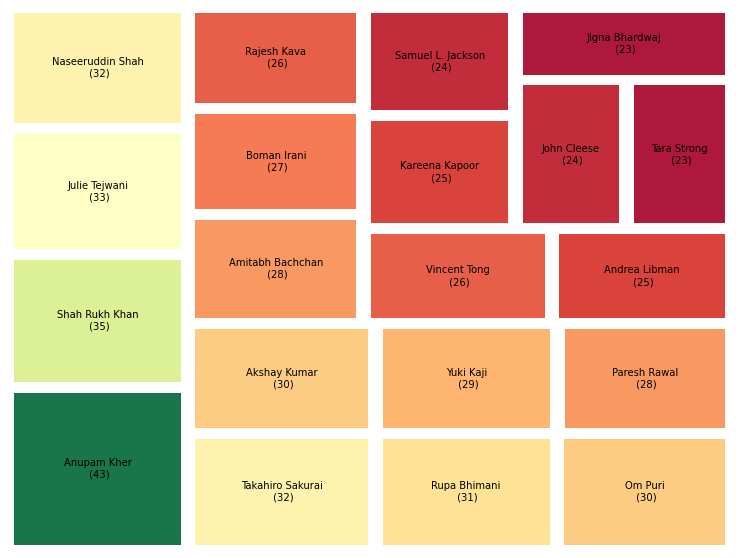

In [47]:
import matplotlib
cmap=matplotlib.cm.RdYlGn
norm=matplotlib.colors.Normalize(vmin=cast_count_sub['count'].min(),
                                 vmax=cast_count_sub['count'].max())
colors=[cmap(norm(i)) for i in cast_count_sub['count']]
plt.subplots(figsize=(13,10))
squarify.plot(sizes=cast_count_sub['count'], label=labels, alpha=.9,pad=True,color=colors)


plt.axis('off')
plt.show()

## Ratings countrywise 

In [48]:
rating_country=df[["rating", "country"]]

In [49]:
rating_country=rating_country.dropna()

In [50]:
counry_list=[]
rating_list=[]
stringlist= rating_country["country"].values.tolist()
ratinglist=rating_country["rating"].values.tolist()
for element in stringlist:
    letter_list = element.split(", ")
    counry_list.extend(letter_list)
    idx=stringlist.index(element)
    rating_list.extend([ratinglist[idx]]*len(letter_list))

In [51]:
bar_table = pd.DataFrame({'country': counry_list, 'rating': rating_list}) 

In [52]:
bar_table1=bar_table.groupby(["rating","country"]).size().reset_index(name='counts')

In [53]:
bar_table1=bar_table1.sort_values(by='counts',ascending=False)

In [54]:
bar_table2=bar_table1.groupby('rating').head(5).reset_index(drop=True)

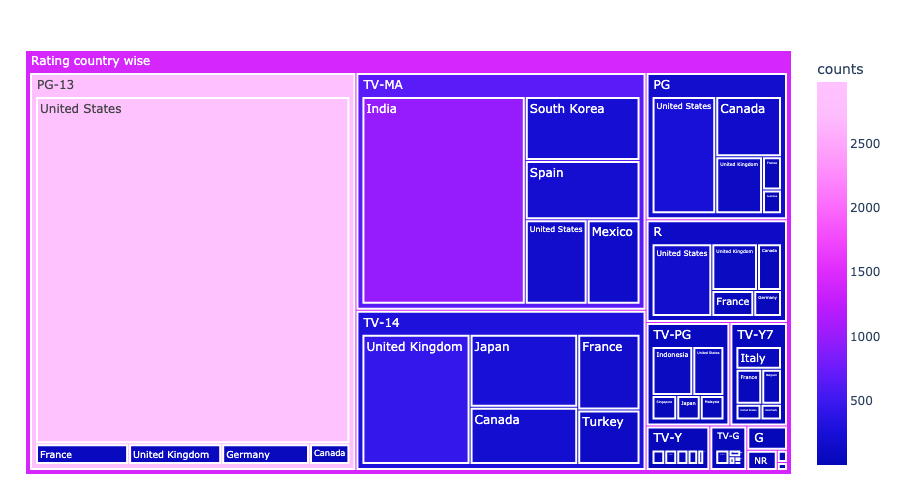

In [55]:
fig = px.treemap(bar_table2, path=[px.Constant("Rating country wise"), 'rating', 'country'], values='counts',
                  color='counts',
                  color_continuous_scale='Plotly3',
                  )
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.update_traces(marker_line_width = 2)
fig.show("png",width=900)

# Top directors 


In [56]:
df1=df.dropna()

In [57]:
df1["director"].unique()

array(['Nosipho Dumisa-Ngoasheng,Daryne Joshua,Travis Taute,Thati Peele',
       'Raghav Subbu', 'Haile Gerima', ..., 'Majid Al Ansari',
       'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [58]:
dir_singlelist=[]
for element in df1["director"].values.tolist():
    letter_list = element.split(",")
    dir_singlelist.extend(letter_list)

In [59]:
unique_dir= list(set( dir_singlelist))

In [60]:
dir_name=[]
count=[]
for element in unique_dir:
    n=dir_singlelist.count(element)
    dir_name.append(element)
    count.append(n)

In [61]:
dir_count=pd.DataFrame({'cast':dir_name, 'count':count})

In [62]:
dir_count1=dir_count.sort_values(by='count',ascending=False).reset_index(drop=True)

In [63]:
dir_count2=dir_count1.iloc[0:10]

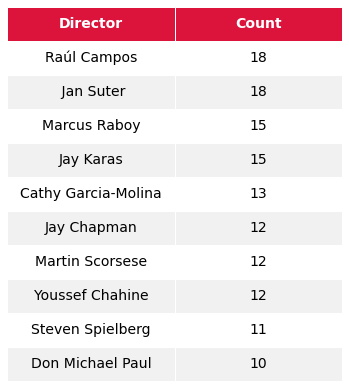

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import six

dir_df = pd.DataFrame()
dir_df['Director'] = dir_count2["cast"].values
dir_df['Count'] =dir_count2["count"].values


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='crimson', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, cellLoc='center', colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax
              

ax = render_mpl_table(dir_df, header_columns=0, col_width=3.0)
plt.show()